# Homework 3 - SVM and Regularization
## CSCI 5622 - Spring 2019
***
**Name**: $Girish Narayanswamy$ 
***

This assignment is due on Canvas by **11.59 PM on Wednesday, March 20**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

Portions of this assignment, including the plotting functions used, are implemented from Andrew Ng's Machine Learning course

## Part 1: Lasso and Ridge regression - 30 points

We have seen that the difference between LASSO and Ridge regression is due to their different regularization model (L1 norm vs. L2 norm). The regularization term in LASSO is $\lambda||\mathbf w||_1$, while the regularization term in ridge regression is  $(\lambda/2) ||\mathbf w||^2$ (where $\mathbf w$ denotes the set of parameters for the linear regression model and $\lambda$ is the trade-off regularization parameter). LASSO typically enforces more _sparsity_ on the resulting $\mathbf w$. That is, the resulting classifier will have a small number of non-zero weights. In this exercise, you'll explore differences in performance between LASSO and Ridge regression algorithms.

You will be using the following data sets:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

class DataA:
    def __init__(self):
        f = lambda x, y : np.random.randn(x, y)
        self.train_x = f(1000, 20)
        self.train_y = f(1000, 1)[:,0]
        self.test_x = f(500, 20)
        self.test_y = f(500, 1)[:,0]
        
class DataB:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class DataC:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]

In [2]:
data_a = DataA()
data_b = DataB()
data_c = DataC()

1. Fit a regressor to the data set using sklearn's `Lasso` module (for more details, read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)):
    1. Train a LASSO model using 5 different values for the regularization parameter $\lambda$. Use $\lambda = 0.01, 0.05, 0.1, 0.2, 0.3$. Report and plot the number of non-zero coefficients.
    2. Report the value of $\lambda$ that yields the minimum number of non-zero coefficients in the resulting $\mathbf w$, and report the number of non-zero coefficients in that case. Keep track of this $\mathbf w$, we will refer to it as $\mathbf w_b$. [This step is only needed if any $\mathbf{w}$ has coefficients that are 0.]
    3. For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of $\lambda$.
    4. Report the value of $\lambda$ that yields the $\mathbf w$ with the minimum test error. Save this $\mathbf w$ as $\mathbf w_d$. How many non-zero coordinates does $\mathbf w_d$ have? Keep track of this, as well as the answers for $\mathbf w_b$ for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for $\mathbf w_b$ and $\mathbf w_d$ for each data set.
    5. For data set A, by increasing the value of $\lambda$, can you get most of the entries to be 0? Can you get every entry to be 0?
    
Note: $\lambda$ is same as $\alpha$ in the sklearn module.

1A
1B
A: Lambda of  0.1 , 0  non-zero coeffs
B: Lambda of  0.3 , 6  non-zero coeffs
C: Lambda of  0.3 , 4  non-zero coeffs
1C
1D
A: Lambda of 0.05 , Test Error of 0.9264453927575017 , 2 Non-zero coeffs
B: Lambda of 0.01 , Test Error of 0.018247756874594758 , 9 Non-zero coeffs
C: Lambda of 0.01 , Test Error of 2.049084592402473 , 10 Non-zero coeffs


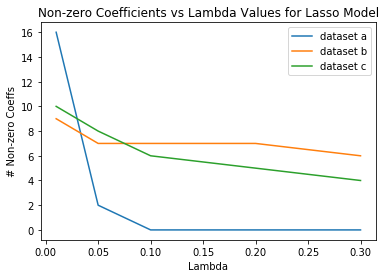

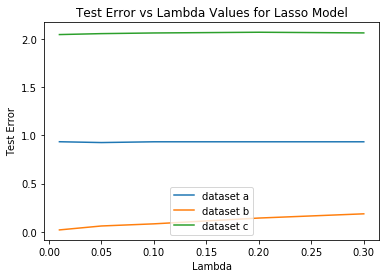

In [3]:
lambda_vals = [0.01, 0.05, 0.10, 0.20, 0.30] # lambda values

# 1A
print("1A")
#TODO

a_nonzero_coeff = []
b_nonzero_coeff = []
c_nonzero_coeff = []

for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_a.train_x, data_a.train_y) # chose training data set
    a_nonzero_coeff.append(len(np.nonzero(lasso.coef_)[0]))
    
for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_b.train_x, data_b.train_y) # chose training data set
    b_nonzero_coeff.append(len(np.nonzero(lasso.coef_)[0])) # num of non-zero coeffs
    
for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_c.train_x, data_c.train_y) # chose training data set
    c_nonzero_coeff.append(len(np.nonzero(lasso.coef_)[0])) # num of non-zero coeffs
    
plt.figure()
plt.plot(lambda_vals, a_nonzero_coeff, label = 'dataset a')
plt.plot(lambda_vals, b_nonzero_coeff, label = 'dataset b')
plt.plot(lambda_vals, c_nonzero_coeff, label = 'dataset c')
plt.title("Non-zero Coefficients vs Lambda Values for Lasso Model")
plt.xlabel('Lambda')
plt.ylabel('# Non-zero Coeffs')
plt.legend()

# 1B
print("1B")
#TODO

a_lambda_min = 0.01
b_lambda_min = 0.01
c_lambda_min = 0.01

a_coeff_min = 0
b_coeff_min = 0
c_coeff_min = 0

for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_a.train_x, data_a.train_y) # chose training data set
    a_nonzero_coeff = len(np.nonzero(lasso.coef_)[0]) # num of non-zero coeffs

    if lam == 0.01:
        a_coeff_min = a_nonzero_coeff
    
    if a_coeff_min > a_nonzero_coeff:
        a_coeff_min = a_nonzero_coeff
        a_lambda_min = lam

for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_b.train_x, data_b.train_y) # chose training data set
    b_nonzero_coeff = len(np.nonzero(lasso.coef_)[0]) # num of non-zero coeffs

    if lam == 0.01:
        b_coeff_min = b_nonzero_coeff
    
    if b_coeff_min > b_nonzero_coeff:
        b_coeff_min = b_nonzero_coeff
        b_lambda_min = lam

for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_c.train_x, data_c.train_y) # chose training data set
    c_nonzero_coeff = len(np.nonzero(lasso.coef_)[0]) # num of non-zero coeffs

    if lam == 0.01:
        c_coeff_min = c_nonzero_coeff
    
    if c_coeff_min > c_nonzero_coeff:
        c_coeff_min = c_nonzero_coeff
        c_lambda_min = lam

print("A: Lambda of ", a_lambda_min, ",", a_coeff_min, " non-zero coeffs")
print("B: Lambda of ", b_lambda_min, ",", b_coeff_min, " non-zero coeffs")
print("C: Lambda of ", c_lambda_min, ",", c_coeff_min, " non-zero coeffs")

# 1C
print("1C")
#TODO

a_mse = []
b_mse = []
c_mse = []

for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_a.train_x, data_a.train_y) # chose training data set
    predict_val = lasso.predict(data_a.test_x) # calculate predicted val based off model
    a_mse.append(mean_squared_error(predict_val, data_a.test_y)) 

for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_b.train_x, data_b.train_y) # chose training data set
    predict_val = lasso.predict(data_b.test_x) # calculate predicted val based off model
    b_mse.append(mean_squared_error(predict_val, data_b.test_y))
    
    
for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_c.train_x, data_c.train_y) # chose training data set
    predict_val = lasso.predict(data_c.test_x) # calculate predicted val based off model
    c_mse.append(mean_squared_error(predict_val, data_c.test_y))  
    
plt.figure()
plt.plot(lambda_vals, a_mse, label = 'dataset a')
plt.plot(lambda_vals, b_mse, label = 'dataset b')
plt.plot(lambda_vals, c_mse, label = 'dataset c')
plt.title("Test Error vs Lambda Values for Lasso Model")
plt.xlabel('Lambda')
plt.ylabel('Test Error')
plt.legend()

# 1D
print("1D")
#TODO

a_mse_min_1d = 0
b_mse_min_1d = 0
c_mse_min_1d = 0

a_lambda_min_1d = 0.01
b_lambda_min_1d = 0.01
c_lambda_min_1d = 0.01

a_coeff_min_1d = 0
b_coeff_min_1d = 0
c_coeff_min_1d = 0

for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_a.train_x, data_a.train_y) # chose training data set
    a_nonzero_coeff = len(np.nonzero(lasso.coef_)[0]) # num of non-zero coeffs
    predict_val = lasso.predict(data_a.test_x) # calculate predicted val based off model
    mse_a = mean_squared_error(predict_val, data_a.test_y)

    if lam == 0.01:
        a_mse_min_1d = mse_a
        a_lambda_min_1d = lam
        a_coeff_min_1d = a_nonzero_coeff
    
    if a_mse_min_1d > mse_a:
        a_mse_min_1d = mse_a
        a_lambda_min_1d = lam
        a_coeff_min_1d = a_nonzero_coeff

for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_b.train_x, data_b.train_y) # chose training data set
    b_nonzero_coeff = len(np.nonzero(lasso.coef_)[0]) # num of non-zero coeffs
    predict_val = lasso.predict(data_b.test_x) # calculate predicted val based off model
    mse_b = mean_squared_error(predict_val, data_b.test_y)

    if lam == 0.01:
        b_mse_min_1d = mse_b
        b_lambda_min_1d = lam
        b_coeff_min_1d = b_nonzero_coeff
    
    if b_mse_min_1d > mse_b:
        b_mse_min_1d = mse_b
        b_lambda_min_1d = lam
        b_coeff_min_1d = b_nonzero_coeff
        
for lam in lambda_vals:
    lasso = linear_model.Lasso(alpha=lam) # create the model with alpha = to lambda
    lasso.fit(data_c.train_x, data_c.train_y) # chose training data set
    c_nonzero_coeff = len(np.nonzero(lasso.coef_)[0]) # num of non-zero coeffs
    predict_val = lasso.predict(data_c.test_x) # calculate predicted val based off model
    mse_c = mean_squared_error(predict_val, data_c.test_y)

    if lam == 0.01:
        c_mse_min_1d = mse_c
        c_lambda_min_1d = lam
        c_coeff_min_1d = c_nonzero_coeff
    
    if c_mse_min_1d > mse_c:
        c_mse_min_1d = mse_c
        c_lambda_min_1d = lam
        c_coeff_min_1d = c_nonzero_coeff

print("A: Lambda of", a_lambda_min_1d, ", Test Error of", a_mse_min_1d, ",", a_coeff_min_1d, "Non-zero coeffs")
print("B: Lambda of", b_lambda_min_1d, ", Test Error of", b_mse_min_1d, ",", b_coeff_min_1d, "Non-zero coeffs")
print("C: Lambda of", c_lambda_min_1d, ", Test Error of", c_mse_min_1d, ",", c_coeff_min_1d, "Non-zero coeffs")

1.
E)

Yes, as lamda increases for dataset A, the number of non-zero coefficients drops to 0. This means that all of the coefficients equal to zero. This occurs for lambda values 0.05 and onwards.

2. Now, we turn to Ridge regression. We'll use sklearn module `Ridge` (read more [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)). Repeat each of the experiment above using Ridge regression. Use $\lambda = 1, 50, 100, 200, 1000$.

2A
2B
A: Lambda of  1 , 20  non-zero coeffs
B: Lambda of  1 , 9  non-zero coeffs
C: Lambda of  1 , 10  non-zero coeffs
2C
2D
A: Lambda of 1000 , Test Error of 0.9314646688732664 , 4 Non-zero coeffs
B: Lambda of 1 , Test Error of 0 , 9 Non-zero coeffs
C: Lambda of 50 , Test Error of 2.0491337966435377 , 10 Non-zero coeffs


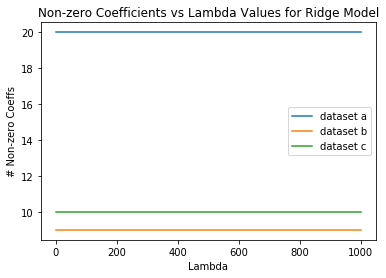

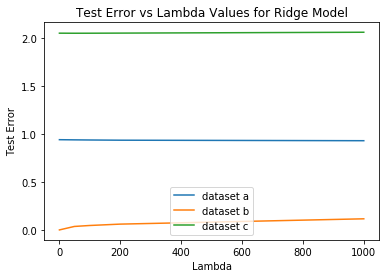

In [4]:
lambda_vals = [1, 50, 100, 200, 1000] # lambda values

# 2A
print("2A")
#TODO

a_nonzero_coeff = []
b_nonzero_coeff = []
c_nonzero_coeff = []

for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_a.train_x, data_a.train_y) # chose training data set
    a_nonzero_coeff.append(len(np.nonzero(ridge.coef_)[0]))
    
for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_b.train_x, data_b.train_y) # chose training data set
    b_nonzero_coeff.append(len(np.nonzero(ridge.coef_)[0])) # num of non-zero coeffs
    
for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_c.train_x, data_c.train_y) # chose training data set
    c_nonzero_coeff.append(len(np.nonzero(ridge.coef_)[0])) # num of non-zero coeffs
    
plt.figure()
plt.plot(lambda_vals, a_nonzero_coeff, label = 'dataset a')
plt.plot(lambda_vals, b_nonzero_coeff, label = 'dataset b')
plt.plot(lambda_vals, c_nonzero_coeff, label = 'dataset c')
plt.title("Non-zero Coefficients vs Lambda Values for Ridge Model")
plt.xlabel('Lambda')
plt.ylabel('# Non-zero Coeffs')
plt.legend()

# 2B
print("2B")
#TODO

a_lambda_min = 1
b_lambda_min = 1
c_lambda_min = 1

a_coeff_min = 0
b_coeff_min = 0
c_coeff_min = 0

for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_a.train_x, data_a.train_y) # chose training data set
    a_nonzero_coeff = len(np.nonzero(ridge.coef_)[0]) # num of non-zero coeffs

    if lam == 1:
        a_coeff_min = a_nonzero_coeff
    
    if a_coeff_min > a_nonzero_coeff:
        a_coeff_min = a_nonzero_coeff
        a_lambda_min = lam

for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_b.train_x, data_b.train_y) # chose training data set
    b_nonzero_coeff = len(np.nonzero(ridge.coef_)[0]) # num of non-zero coeffs

    if lam == 1:
        b_coeff_min = b_nonzero_coeff
    
    if b_coeff_min > b_nonzero_coeff:
        b_coeff_min = b_nonzero_coeff
        b_lambda_min = lam

for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_c.train_x, data_c.train_y) # chose training data set
    c_nonzero_coeff = len(np.nonzero(ridge.coef_)[0]) # num of non-zero coeffs

    if lam == 1:
        c_coeff_min = c_nonzero_coeff
    
    if c_coeff_min > c_nonzero_coeff:
        c_coeff_min = c_nonzero_coeff
        c_lambda_min = lam

print("A: Lambda of ", a_lambda_min, ",", a_coeff_min, " non-zero coeffs")
print("B: Lambda of ", b_lambda_min, ",", b_coeff_min, " non-zero coeffs")
print("C: Lambda of ", c_lambda_min, ",", c_coeff_min, " non-zero coeffs")

# 2C
print("2C")
#TODO

a_mse = []
b_mse = []
c_mse = []

for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_a.train_x, data_a.train_y) # chose training data set
    predict_val = ridge.predict(data_a.test_x) # calculate predicted val based off model
    a_mse.append(mean_squared_error(predict_val, data_a.test_y)) 

for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_b.train_x, data_b.train_y) # chose training data set
    predict_val = ridge.predict(data_b.test_x) # calculate predicted val based off model
    b_mse.append(mean_squared_error(predict_val, data_b.test_y))
    
    
for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_c.train_x, data_c.train_y) # chose training data set
    predict_val = ridge.predict(data_c.test_x) # calculate predicted val based off model
    c_mse.append(mean_squared_error(predict_val, data_c.test_y))  
    
plt.figure()
plt.plot(lambda_vals, a_mse, label = 'dataset a')
plt.plot(lambda_vals, b_mse, label = 'dataset b')
plt.plot(lambda_vals, c_mse, label = 'dataset c')
plt.title("Test Error vs Lambda Values for Ridge Model")
plt.xlabel('Lambda')
plt.ylabel('Test Error')
plt.legend()

# 2D
print("2D")
#TODO

a_mse_min_2d = 0
b_mse_min_2d = 0
c_mse_min_2d = 0

a_lambda_min_2d = 1
b_lambda_min_2d = 1
c_lambda_min_2d = 1

a_coeff_min_2d = 0
b_coeff_min_2d = 0
c_coeff_min_2d = 0

for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_a.train_x, data_a.train_y) # chose training data set
    a_nonzero_coeff = len(np.nonzero(lasso.coef_)[0]) # num of non-zero coeffs
    predict_val = ridge.predict(data_a.test_x) # calculate predicted val based off model
    mse_a = mean_squared_error(predict_val, data_a.test_y)

    if lam == 1:
        a_mse_min_2d = mse_a
        a_lambda_min_2d = lam
        a_coeff_min_2d = a_nonzero_coeff
    
    if a_mse_min_2d > mse_a:
        a_mse_min_2d = mse_a
        a_lambda_min_2d = lam
        a_coeff_min_2d = a_nonzero_coeff

for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_b.train_x, data_b.train_y) # chose training data set
    b_nonzero_coeff = len(np.nonzero(ridge.coef_)[0]) # num of non-zero coeffs
    predict_val = ridge.predict(data_b.test_x) # calculate predicted val based off model
    mse_b = mean_squared_error(predict_val, data_b.test_y)

    if lam == 1:
        b_mse_min_1d = mse_b
        b_lambda_min_2d = lam
        b_coeff_min_2d = b_nonzero_coeff
    
    if b_mse_min_2d > mse_b:
        b_mse_min_2d = mse_b
        b_lambda_min_2d = lam
        b_coeff_min_2d = b_nonzero_coeff
        
for lam in lambda_vals:
    ridge = linear_model.Ridge(alpha=lam) # create the model with alpha = to lambda
    ridge.fit(data_c.train_x, data_c.train_y) # chose training data set
    c_nonzero_coeff = len(np.nonzero(ridge.coef_)[0]) # num of non-zero coeffs
    predict_val = ridge.predict(data_c.test_x) # calculate predicted val based off model
    mse_c = mean_squared_error(predict_val, data_c.test_y)

    if lam == 1:
        c_mse_min_2d = mse_c
        c_lambda_min_2d = lam
        c_coeff_min_2d = c_nonzero_coeff
    
    if c_mse_min_2d > mse_c:
        c_mse_min_2d = mse_c
        c_lambda_min_2d = lam
        c_coeff_min_2d = c_nonzero_coeff

print("A: Lambda of", a_lambda_min_2d, ", Test Error of", a_mse_min_2d, ",", a_coeff_min_2d, "Non-zero coeffs")
print("B: Lambda of", b_lambda_min_2d, ", Test Error of", b_mse_min_2d, ",", b_coeff_min_2d, "Non-zero coeffs")
print("C: Lambda of", c_lambda_min_2d, ", Test Error of", c_mse_min_2d, ",", c_coeff_min_2d, "Non-zero coeffs")

2.
E)

No, for all values of lambda testde, the number of non-zero coefficients is 20. This suggests that regardless of the value of lamda, the number of non-zero coefficients will not approach / become zero. 

3. Compare the two algorithms on each data set: compare the number of non-zero coordinates of the $\mathbf w_d$'s, and compare the test error rates of the $\mathbf w_b$'s. Report your results and comment on them.

The number of non-zero values for the first algorithm (Lasso Model) vary significantly more than for the second algorithm (Ridge Model). For the ridge regression the number of non-zero coefficients is fairly constant regardless of lambda. 

The test error rate for both models is very simillar accross all three datasets. For both models the test error rate graph is fairly flat. The similarity of the test error graphs shows that both algorithms are consistent.

## Part 2: Visualizing Data and Decision Boundaries for different kernels - 30 points

### A. Training SVM with Linear Kernel (Dataset 1)

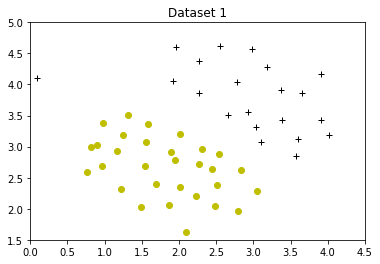

In [5]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data


# Load from data1
mat_data = sio.loadmat('./data/data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

**A:** In `data1.mat`, most of the positive and negative examples can be separated by a single line. Train SVM with linear kernel with C = 1 and plot the decision boundary using `visualize_boundary_linear(X, y, clf)`. `clf` is the SVM classifier. For the classifier, you should use the scikit-learn implementation. Feel free to experiment with different values of C and see what effect it has on the decision boundary. However finally train your classifier with C = 1

Mean accuracy of SVM (linear kernel): 0.9803921568627451


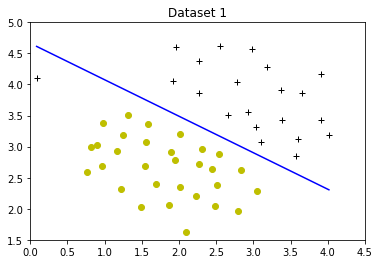

In [6]:
# SOLUTION 
from sklearn import svm
from visualize_boundary_linear import visualize_boundary_linear

### START CODE HERE ### (approx. 3 lines)

# 1. Create a linear SVM classifier
clf = svm.LinearSVC(C=1)

# 2. Fit the model according to the given training data.
clf.fit(X, y)

# 3. Print the mean accuracy on the given train data and labels using the score function in scikit-learn
print("Mean accuracy of SVM (linear kernel):", clf.score(X, y))

### END CODE HERE ### 


plt.figure()
# Uncomment the below line after you build your classifier
visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

### B. Training SVM with RBF Kernel (Dataset 2)

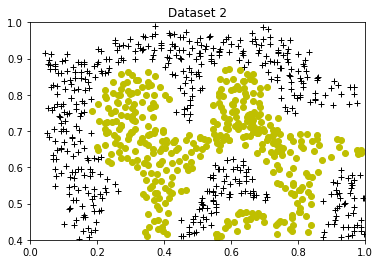

In [7]:
# Load from data2
mat_data = sio.loadmat('./data/data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

**B** In `data2.mat`, the positive and negative data points are not linearly separable. For this dataset, construct an SVM classifier with a Gaussian kernel to learn a non-linear decision boundary. You should use the scikit-learn implementation for the same. To plot the decision boundary use `visualize_boundary(X, y, clf)`

Mean accuracy of SVM (RBF kernel): 0.9698725376593279


/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


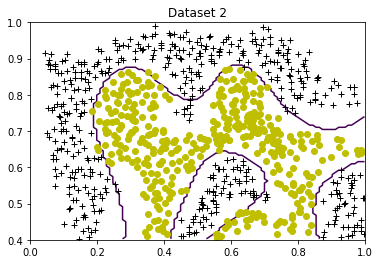

In [8]:
from visualize_boundary import visualize_boundary

# SVM Parameters to be used
C = 100
gamma = 10

### START CODE HERE ### (approx. 3 lines)

# 1. Create a SVM classifier with kernel='rbf'
clf = svm.SVC(gamma=gamma, C=C, kernel='rbf')

# 2. Fit the model according to the given training data.
clf.fit(X, y)

# 3. Print the mean accuracy on the given train data and labels using the score function in scikit-learn
print("Mean accuracy of SVM (RBF kernel):", clf.score(X, y))

### END CODE HERE ### 

plt.figure()
# Uncomment the below line after you build your classifier
visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 3: Kernel Perceptron - 40 points

For this task, you will be implement the Kernel Perceptron using different kernel functions. You will then use the training and test data provided below to train and test your implementation. Finally you will have to report the error rate as a percentage for each kernel function.

**A:** Implement the kernel functions below:

In [9]:
import numpy as np
from numpy import linalg

def linear_kernel(x1, x2):
    #  TODO
    
    k = np.dot(x1, x2)
    return k
    pass
    

def polynomial_kernel(x, y, p = 3, c = 1):
    #  TODO
    #  p = degree of the polynomial
    
    k = (np.dot(x, y) + c)**p
    return k
    pass
    
def gaussian_kernel(x, y, sigma = 0.5):
    #  TODO:
    
    k = np.exp((-(linalg.norm(x - y))**2)/(2*sigma**2))
    return k
    pass

In [10]:
import unittest

class TestKernels(unittest.TestCase):
    
    def setUp(self):
        self.x1 = np.array([1, 2, 1])
        self.x2 = np.array([0, 4, -1])
        
    def test0(self):
        """
        Test the linear kernel
        """
        self.assertEqual(linear_kernel(self.x1, self.x2), 7)
    
    def test_polynomial_kernel(self):
        """
        Test the polynomial kernel
        """
        self.assertEqual(polynomial_kernel(self.x1, self.x2), 512)
        
    def test_gaussian_kernel(self):
        """
        Test the gaussian kernel
        """
        self.assertAlmostEqual(gaussian_kernel(self.x1, self.x2) * 10 ** 8, 1.52299, 4)
    

tests = TestKernels()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)
            

...
----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

**B:** Implement the following methods of the `KernelPerceptron` class. The `__init__` takes also as input the kernel to use. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [11]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 1):
        self.kernel = kernel
        self.Niter = Niter
        self.support_vector_x = None
        self.support_vector_y = None
        
    def fit(self, X, y):
        # TODO: 
        
        # init values 
        num_exps = X.shape[0] # number of examples is same as shape of X dataset
        k = np.zeros([num_exps, num_exps]) # init kernel to zeros array
        self.alpha = np.zeros(num_exps) # init alphas values to 0
        
        # iterate twice over the size of X in order to construct kernel k
        # adapted from  Abigail's Instructor piazza answer 
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                k[i,j] = self.kernel(X[i], X[j]) # set kernel values
        
        # compute alpha values 
        for i in range(self.Niter): # iterate through epochs
            for j in range(k.shape[0]): # iterate over kernel size
                if(y[j] != np.sign(np.sum(k[:, j]*self.alpha*y))):
                    self.alpha[j] += 1 
                    
        # getting support vectors 
        # adapted from  Abigail's Instructor piazza answer 
        sv = self.alpha > 1e-5
        self.alpha = self.alpha[sv]
        self.support_vector_x = X[sv]
        self.support_vector_y = y[sv]
        pass

    def predict(self, X):
        # TODO: 
        
        num_sv = self.support_vector_x.shape[0] # grab num/size of support vector
        y = np.zeros(X.shape[0]) # init labels 
        for i, xi in enumerate(X): # i is the index, xi is the x data at index i
            scr = 0 # re-init score 
            
            for alpha, s_x, s_y in zip(self.alpha, self.support_vector_x, self.support_vector_y):                
                scr += alpha * s_y * self.kernel(xi, s_x)
            y[i] = np.sign(scr)   
            
        return y
        pass

##  Solving a new classification problem using SVM

We are using the IRIS Dataset for this classification task. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length.We are going to use this dataset to test our Kernel Perceptron
<br>

<img src="wide_iris.png" alt="Drawing" style="width: 600px;"/>

<br>

In [12]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()
        
data = Data()

In [13]:
Niter = 20 # num iterations, 20 as defined below
kernel_types = [linear_kernel, polynomial_kernel, gaussian_kernel] # different types of kernels 

for k in kernel_types: # iterate through kernel functions
    test =  KernelPerceptron(k, Niter)
    test.fit(data.X_train, data.y_train)
    pred_labels = test.predict(data.X_test)
    scr = 0 # reinit score to 0
    
    for pred, truth in zip(pred_labels, data.y_test):
        if pred == truth: # classified correctly
            scr += 1
    print("Test Error =", (1 - scr/len(data.y_test))*100, k.__name__,)

Test Error = 40.0 linear_kernel
Test Error = 6.666666666666665 polynomial_kernel
Test Error = 6.666666666666665 gaussian_kernel


**C:** Report the test error as a percentage for each kernel function for `Niter = 20`

**Expected Output**: 

<table> 
    <tr>
    <td>
    **Linear Kernel**
    </td>
     <td>
    40 %
    </td>
    </tr>
      <tr>
    <td>
    **Polynomial Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>
      <tr>
    <td>
    **Gaussian Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>

</table> 